In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data = pd.read_csv('F:/ml-data/NLP-disaster/train.csv')
test_data = pd.read_csv('F:/ml-data/NLP-disaster/test.csv')

In [3]:
train_data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


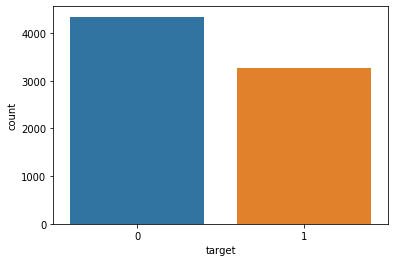

In [5]:
sns.countplot(train_data['target'])

In [7]:
sentence = train_data['text'].tolist()
label = train_data['target'].tolist()

In [8]:
test_sentence = test_data['text'].tolist()

In [9]:
TRAIN_TEST_REDIO = 0.8
train_size = int(len(sentence) * 0.8)
train_sentence = sentence[:train_size]
test_sentence = sentence[train_size:]
train_label = np.array(label[:train_size])
test_label = np.array(label[train_size:])

In [10]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

Using TensorFlow backend.


In [11]:
tokenizer = Tokenizer(num_words=500, oov_token='<OOV>')

In [12]:
tokenizer.fit_on_texts(train_sentence)

In [13]:
word_idx = tokenizer.word_index


In [14]:
train_sentence = tokenizer.texts_to_sequences(train_sentence) ## 把 txt 转化成词index集合

In [28]:
train_padded = pad_sequences(train_sentence, maxlen=40, padding='post', truncating='post') ## 补充/截取 集合中元素 多于maxlen截取，少于maxlen补充

In [29]:
test_sentence = tokenizer.texts_to_sequences(test_sentence)
test_padded = pad_sequences(test_sentence, maxlen=40, padding='post', truncating='post')

In [30]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Dropout, BatchNormalization

In [32]:
model = Sequential()
model.add(Embedding(500, 16, input_length = 40)) ## embedding想当于一个没有bias的全连接层， 把40维度降到16个维度
model.add(LSTM(16, return_sequences = True))   
model.add(LSTM(16))
model.add(Dense(18, activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(9, activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(1, activation = 'sigmoid'))

In [34]:
model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 40, 16)            8000      
_________________________________________________________________
lstm_1 (LSTM)                (None, 40, 16)            2112      
_________________________________________________________________
lstm_2 (LSTM)                (None, 16)                2112      
_________________________________________________________________
dense_1 (Dense)              (None, 18)                306       
_________________________________________________________________
dropout_1 (Dropout)          (None, 18)                0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 18)                72        
_________________________________________________________________
dense_2 (Dense)              (None, 9)                

In [35]:
from keras.callbacks import EarlyStopping

In [36]:
early_stop = EarlyStopping(min_delta= 0.001, patience= 10)

In [37]:
history = model.fit(train_padded, train_label, epochs=20, validation_data=(test_padded, test_label), callbacks=[early_stop], verbose=1)


Train on 6090 samples, validate on 1523 samples
Epoch 1/20
6090/6090 [==============================] - 13s 2ms/step - loss: 0.6828 - accuracy: 0.5808 - val_loss: 0.6925 - val_accuracy: 0.5345
Epoch 2/20
6090/6090 [==============================] - 13s 2ms/step - loss: 0.5648 - accuracy: 0.7177 - val_loss: 0.6770 - val_accuracy: 0.5522
Epoch 3/20
6090/6090 [==============================] - 13s 2ms/step - loss: 0.5081 - accuracy: 0.7594 - val_loss: 0.5184 - val_accuracy: 0.7708
Epoch 4/20
6090/6090 [==============================] - 12s 2ms/step - loss: 0.4937 - accuracy: 0.7747 - val_loss: 0.5796 - val_accuracy: 0.7072
Epoch 5/20
6090/6090 [==============================] - 12s 2ms/step - loss: 0.4855 - accuracy: 0.7833 - val_loss: 0.6454 - val_accuracy: 0.6454
Epoch 6/20
6090/6090 [==============================] - 12s 2ms/step - loss: 0.4716 - accuracy: 0.7923 - val_loss: 0.5255 - val_accuracy: 0.7341u - ETA
Epoch 7/20
6090/6090 [==============================] - 13s 2ms/step - los

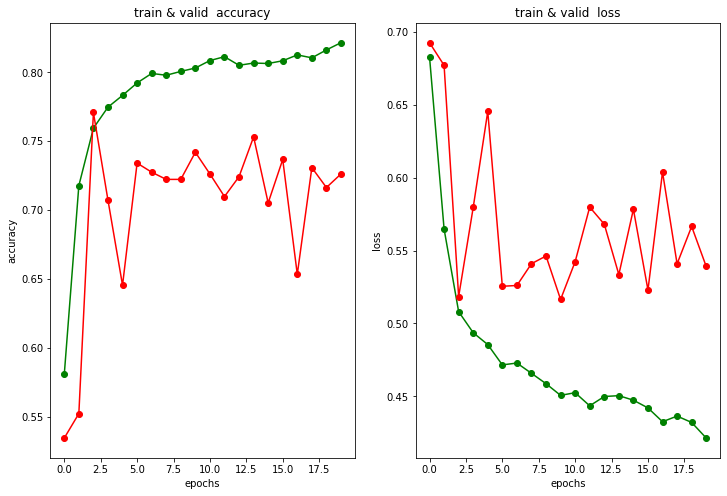

In [44]:
epochs = [i for i in range(20)]
fig, ax = plt.subplots(1, 2)
train_accuracy = history.history['accuracy']
valid_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
valid_loss = history.history['val_loss']

fig.set_size_inches(12, 8)

ax[0].plot(epochs, train_accuracy, 'go-', label = 'train accuracy')
ax[0].plot(epochs, valid_accuracy, 'ro-', label = 'valid accuracy')
ax[0].set_title('train & valid  accuracy')
ax[0].set_xlabel('epochs')
ax[0].set_ylabel('accuracy')

ax[1].plot(epochs, train_loss, 'go-', label = 'train loss')
ax[1].plot(epochs, valid_loss, 'ro-', label = 'valid loss')
ax[1].set_title('train & valid  loss')
ax[1].set_xlabel('epochs')
ax[1].set_ylabel('loss')
plt.show()